### 데이터의 문제
**결측치** : 중요한 데이터가 빠져있다.\
**데이터 오류** : 잘못된 데이터가 입력되어 있다.\
**이상치** : 값의 범위가 일반적인 범위에서 벗어나 있다.\
**형식** : 데이터 형식이 분석하기에 적합하지 않다.\
**범주형 데이터** : 범주형으로 표현되어야하는 데이터가 다른 형테로 되어있다.

### 해결법
Scaling\
Sampling\
Dimensionality Redution\
Categorical Variable to Numeric Variable


# Scaling

변수의 크기가 너무 작거나 큰 경우 결과에 미치는 영향력이 일정하지 않을 수 있음\
-> 변수의 크기를 일정하게 맞추어 주는 작업\
scikit-learn\
Min-Max\
z정규화 Standard Scailing

지역별 부동산 가치를 따졌을때 서울에서의 100만원은 최하치라고 했을때 제주도에서의 100만원은 최고치라고 따졌을때 데이터의 기준의 차이가 크기때문에 이를 맞추기 위한과정

###Min-Max Scaling 
Min-Max Scaling을 하면 값의 범위가 0~1 사이로 변경됨, 이렇게 하는 이유는 특정 값들이 전체에 미치는 영향을 줄여서 모든 값들이 단위 크기와 상관없이 중요한 영향력을 가질 수 있게 하기 위함\
\
모든 수치를 1 기준으로 비율이 조정되기 때문에 모든 feature들이 같은 조건에서 학습 될 수 있게 하는 기법\
&nbsp;&nbsp;|--------------------|\
0&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1


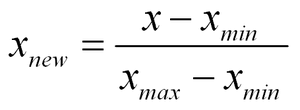

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
from os.path import join

In [4]:
# abalone 경로
abalone_path = join('.','abalone.txt')
abalone_path

'./abalone.txt'

In [5]:
# abalone_attributes 경로
column_path = join('.','abalone_attributes.txt')
column_path

'./abalone_attributes.txt'

In [6]:
abalone_columns = list()

# for 문을 사용하여 column을 한줄씩 읽어 붙인다.
for line in open(column_path):
  abalone_columns.append(line.strip()) # strip() -> 컬럼뒤 \n 같은 필요없는 부분을 잘라준다.

abalone_columns

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

In [7]:
# pandas로 csv파일을 불러온다.
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
# 성별을 라벨로
label = data['Sex']

# 성별을 테이블에서 삭제
del data['Sex']

In [9]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [10]:
# 전체 column의 요약 정보
# count에 빠진정보는 count가 되지않는다.

data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [12]:
# Min-Max Scaling

# data = (data - np.min(data)) / (np.max(data) - np.min(data))
# data

In [13]:
# 위 식을 사용하면 사용, 검증에서 오류가 발생 할 수 있으므로 만들어 놓은 것을 사용한다.

from sklearn.preprocessing import MinMaxScaler
mMscaler = MinMaxScaler()
# fit() 데이터를 minmax scaler 한번 맞춰본다
# 너무 딱 맞으면 overfiting
mMscaler.fit(data)
# transform() 데이터를 실제로 변환한다.
mScaled_data = mMscaler.transform(data)
mScaled_data

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [14]:
# 한번에 두단계
mScaled_data = mMscaler.fit_transform(data)
mScaled_data

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [15]:
# pandas의 Data Frame 개체로 변환

mScaled_data = pd.DataFrame(mScaled_data, columns=data.columns)
mScaled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


###Standard Scaling

z-score라고 부르는 데이터를 통계적으로 표준정규분포화 시켜 스케일링 하는 방식\
데이터의 평균이 0,\
표준편차가 1이되도록 스케일링함.\
&nbsp;&nbsp;|----------|----------|\
-1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1

In [16]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

sdscaled_data = sdscaler.fit_transform(data)

In [17]:
sdscaled_data = pd.DataFrame(sdscaled_data, columns=data.columns)
sdscaled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


Min-Max, Standard 중에 무엇을 사용해야할지는 case by case

## *Sampling*

샘플링을 하는 이유는 클래스 불균형 문제를 해결하기 위함\
클래스 불균형 문제란\
분류를 목적으로 하는 데이터 셋에 클래스 라벨의 비율이 균형적으로 맞지 않고,\
한쪽으로 치우치게 되어 각 클래스의 데이터를 학습하기 어려워지는 경우
\
\
적은 클래스의 수를 증가 시키는 Oversampling\
많은 클래스의 수를 감소 시키는 Undersampling\
\
\
ex)\
개 사진 10000장 고양이 사진 5000장의 경우 고양이 사진 5000장을 늘려 Oversampling 한다. 보통 Oversampling을 선호한다.

###RandomSampling

Random으로 데이터를 선택하여 복제 혹은 제거하는 방식으로 사용 가장 쉬운방법이나 문제점이 존재\
복제하는경우 선택된 데이터가 많아지게 되면서 데이터 자체가 과접합 될 수 있음\
제거하는 경우 데이터셋이 가지고 있는 정보 자체의 손싱리 생길 수 있음

imblearn

In [18]:
# Sampling

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

In [19]:
# 다시 샘플링 한다.

oversampled_data, oversampled_ladel = ros.fit_resample(data, label) # 데이터, 라벨 정보를 준다.
undersampled_data, undersampled_label = rus.fit_resample(data, label)

# numpy 배열 을 pandas 배열

oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)
undersampled_data = pd.DataFrame(undersampled_data, columns=data.columns)

In [20]:
print('원본 데이터의 클래스 비율 : \n{}'.format(pd.get_dummies(label).sum())) # dummies
print('oversampled 데이터의 클래스 비율 : \n{}'.format(pd.get_dummies(oversampled_ladel).sum())) # 원본에서 제일 많은 갯수에 맞춰진 것을 볼 수 있다. 편향되는 결과가 되는 경우가 있다. get_dummies->데이터의 가지수를 보여준다.
print('undersampled 데이터 클래스 비율 : \n{}'.format(pd.get_dummies(undersampled_label).sum())) # 원본에서 제일 적은 갯수에 맞춰진 것을 볼 수 있다. 

원본 데이터의 클래스 비율 : 
F    1307
I    1342
M    1528
dtype: int64
oversampled 데이터의 클래스 비율 : 
F    1528
I    1528
M    1528
dtype: int64
undersampled 데이터 클래스 비율 : 
F    1307
I    1307
M    1307
dtype: int64


## *SMOTE(Synthetic Minority Oversampling Technique)*

임의 over,under 샘플링은 데이터 중복으로 인한 과적합 문제와 데이터 손실의 문제가 있어 그런 문제를 최대한 해결할 수 있는 방법으로 SMOTE 알고리즘이 제시됨.

SMOTE 알고리즘은 수가 적은 클래스의 점을 하나 선택해 k개의 가까운 데이터 샘플을 찾고 그 사이에 새로운 점을 생성하는 방식.

SMOTE의 장점은 데이터 손실이 없고 과적합을 완화 시킬 수 있음.

In [21]:
from sklearn.datasets import make_classification # 데이터를 공급하면 분류해준다. 샘플데이터를 생성해 준다. (abalon은 실습에 적합하지 않다)
data, label = make_classification(n_samples=1000,  # 총샘플의 개수 지정
                    n_features=2, # 데이터 안의 내용 가지 수
                    n_redundant=0,
                    n_informative=2, # 데이터 값이 튀는 애들의 갯수
                    n_repeated=0, # 몇 번 반복할 것인지.
                    n_classes=3, # 그룹
                    n_clusters_per_class=1,
                    weights=[0.05,0.15,0.8], # 샘플의 가중치
                    class_sep=0.8,
                    random_state=2019) # 시드값

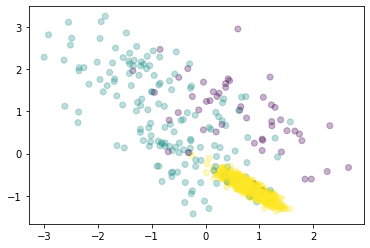

In [22]:
fig = plt.Figure(figsize=(12,6)) #그림판 (사이즈12,6)
plt.scatter(data[:,0],data[:,1],c=label,alpha=0.3) # 데이터의 점을 찍는다. c->색, alpha->투명도

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [24]:
smoted_data, smoted_label = smote.fit_resample(data,label)
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 비율 \n{}'.format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율 
0     53
1    154
2    793
dtype: int64

SMOTE 결과 비율 
0    793
1    793
2    793
dtype: int64


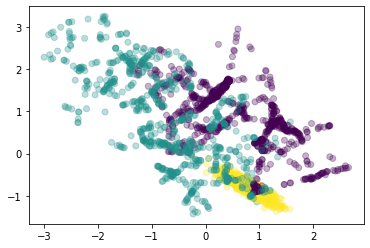

In [25]:
fig = plt.Figure(figsize=(12,6)) 
plt.scatter(smoted_data[:,0],smoted_data[:,1],c=smoted_label,alpha=0.3) # 데이터의 점을 찍는다. c->색, alpha->투명도
# 단독으로 멀리 떨어져 있는 데이터를 기준으로 줄지어 데이터를 늘려준다.

## *주성분 분석 Pcrinciapl Component Analysis, PCA*

대표적인 차원 축소 기법으로 주 성분 분석(PCA)이 사용됨.\
PCA는 여러 차원으로 이어진 데이터를 가장 잘 표현하는 축으로 Projection 해서 차원을 축소하는 방식을사용함.\
데이터를 가장 잘 표현하는 축이란 데이터의 분산을 잘 표현하는 축임.


In [26]:
from sklearn.datasets import load_digits
digits = load_digits()

In [27]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [28]:
data = digits.data
label = digits.target

In [29]:
data.shape

(1797, 64)

In [30]:
# 첫 번째 데이터를 지정 numpy의 기능을 사용하여 8,8의 2차원 형태로 변환한다.
data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Label : 0


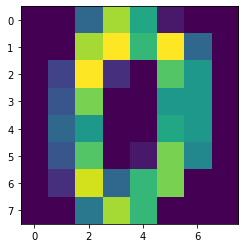

In [31]:
# 데이터를 8,8 형태로 그림으로 
plt.imshow(data[0].reshape(8,8))
print('Label : {}'.format(label[0]))

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [33]:
new_data = pca.fit_transform(data)

In [34]:
# PCA를 거친 데이터가 줄어든 것이 보인다.
print('원본 데이터의 차원 : \n{}'.format(data.shape))
print('PCA를 거친 데이터의 차원 : \n{}'.format(new_data.shape))

원본 데이터의 차원 : 
(1797, 64)
PCA를 거친 데이터의 차원 : 
(1797, 2)


In [35]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [36]:
# 64개의 차원을 2개의 차원으로 압축시켰다.
new_data[0]

array([-1.25946496, 21.27487853])

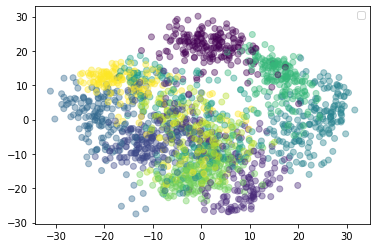

In [37]:
plt.scatter(new_data[:,0],new_data[:,1],c=label, alpha=0.4)
plt.legend()

# *Categorical Variable to Numeric Variable*
(범주형 변수에서 숫자형 변수로)


* 범주형 데이터란 차의 등급을 나타내는 소형, 중형, 대형과 같이 범주로 분류될 수 있는 변수를 의미
* 범주형 데이터는 주로 데이터 상에서 문자열로 표시되는데 문자와 숫자가 매핑 되는 형태로 표현되기도 함
* 컴퓨터가 data를 활용하여 모델화 하고 학습하기 위해서는 data를 모두 수치화 해야 함
* 컴퓨터가 data를 활용하여 모델화하고 학습하기 위해서는 data를 모두 수치화 해야 함

수치화 방법 :

Label Encoding(일반적으로 쓸 수 있는 방법)\
One-hot Enconding(더 확실한 방법)

## *Label Encoding*

Label Encoding은 n개의 범주형 데이터를 0~n-1의 연속적인 수치 데이터로 표현함\
Label Encoding은 간단한 방법이지만 문제를 단순화 시킬 수 있음.


| Original Data| Ordinal Encoding|
|----|----|
|Poor|1|
|Good|2|
|Very Good|3|
|Exellent|4|

위 표대로 poor,Good 같이 문자로 입력해도 좋지만 1,2,3 과 같이 수치로 변환 시켜서 입력한다.\
문자 보다는 숫자가 훨씬 깔끔하게 처리 할 수 있다.

In [40]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)

In [41]:
label = data['Sex']

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
type(label) # 현제 형태 : Series객체

pandas.core.series.Series

In [44]:
label # M=1,F=2,I=3 같이 숫자로 바꿔서 쓴다.

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [49]:
label_encoded_label = le.fit_transform(label)
label_encoded_label

array([2, 2, 0, ..., 2, 0, 2])

## *One Hot Encoding*





*   One-hot encoding은 n개의 범주형 데이터를 n개의 비트 벡터로 표현함
*   개, 고양이, 얼룩말이 있다면 3개의 비트가 필요
*   One-hot encoding은 서로 다른 범주에 대해서는 벡터 내적을 취했을 때,
 내적이 0이 되면서 서로 다른 범주는 독립적이라는 것을 표현함.\
(내적이 0이라는 말은 교차 하지 않는다라는 말)
* 문제는 1000개의 단어가 있다면 1000개의 차원이 필요함.


In [55]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

one_hot_encoded = ohe.fit_transform(label.values.reshape((-1,1)))

In [56]:
one_hot_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])